# Goals


### Understand the role of freezing models in transfer learning


### Why freeze/unfreeze base models in transfer learning


### Use comparison feature to appropriately set this parameter on custom dataset


### You will be using lego bricks dataset to train the classifiers

# What is freezing base network


    - To recap you have two parts in your network
        - One that already existed, the pretrained one, the base network
        - The new sub-network or a single layer you added


    -The hyper-parameter we can see here: Freeze base network
        - Freezing base network makes the base network untrainable
        - The base network now acts as a feature extractor and only the next half is trained
        - If you do not freeze the base network the entire network is trained

# Table of Contents


## [0. Install](#0)


## [1. Freeze Base network in resnet50 and train a classifier](#1)


## [2. Unfreeze base network in resnet50 and train another classifier](#2)


## [3. Compare both the experiment](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1922 (delta 8), reused 16 (delta 7), pack-reused 1905
Receiving objects: 100% (1922/1922), 69.95 MiB | 15.27 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset - LEGO Classification
    - https://www.kaggle.com/joosthazelzet/lego-brick-images/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RB_f2Kv3vkBXcQnCSVqCvaZFBHizQacl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1RB_f2Kv3vkBXcQnCSVqCvaZFBHizQacl" -O LEGO.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq LEGO.zip

In [1]:
if os.path.isfile("LEGO/train/.DS_Store"):
    os.system("rm LEGO/train/.DS_Store");

NameError: name 'os' is not defined

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using keras backend 
from keras_prototype import prototype

<a id='1'></a>
# Freeze Base network in resnet50 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Freeze_Base_Network");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: Freeze_Base_Network
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Freeze_Base_Network/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Freeze_Base_Network
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [11]:
gtf.Default(dataset_path="LEGO/train", 
            model_name="resnet50", 
            
            
            
            freeze_base_network=True,   # Set this param as true
            
            
            
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     LEGO/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 4466 images belonging to 16 classes.
Found 1913 images belonging to 16 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 4466
    Num val images:   1913
    Num classes:      16

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  True

## Another thing to notice from summary

    Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num of potentially trainable layers:  181
        Num of actual trainable layers:       6
        

### There are a total of 181 layers

### Since we have freezed base network only 6 are trainable, the set of layers added later

## Train the classifier

In [12]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
1116/1116 [==============================] - 43s 38ms/step - loss: 2.3042 - acc: 0.2883 - val_loss: 2.5995 - val_acc: 0.2113

Epoch 00001: saving model to workspace/Project/Freeze_Base_Network/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 2.59953, saving model to workspace/Project/Freeze_Base_Network/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Freeze_Base_Network/output/models/intermediate_model_01.h5
Epoch 2/5
1116/1116 [==============================] - 37s 33ms/step - loss: 1.6111 - acc: 0.5090 - val_loss: 2.4162 - val_acc: 0.2850

Epoch 00002: saving model to workspace/Project/Freeze_Base_Network/output/models/resume_state.h5

Epoch 00002: val_loss improved from 2.59953 to 2.41617, saving model to workspace/Project/Freeze_Base_Network/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project/Freeze_Base_Network/output/models/intermediate_model_02.h5
Epoch 3/5
1116/1116 [==========

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [13]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Freeze_Base_Network", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Project/Freeze_Base_Network/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Freeze_Base_Network
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Freeze_Base_Network/



## Load the validation dataset

In [14]:
gtf.Dataset_Params(dataset_path="LEGO/valid");
gtf.Dataset();

Dataset Details
    Test path:     LEGO/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 6379 images belonging to 16 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 6379
    Num classes:      16



## Run validation

In [15]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing
6379/6379 [==============================] - 99s 16ms/step

    Result
        class based accuracies
            0. 11214 Bush 3M friction with Cross axle - 18.25 %
            1. 18651 Cross Axle 2M with Snap friction - 27.250000000000004 %
            2. 2357 Brick corner 1x2x2 - 0.0 %
            3. 3003 Brick 2x2 - 0.0 %
            4. 3004 Brick 1x2 - 37.5 %
            5. 3005 Brick 1x1 - 40.25 %
            6. 3022 Plate 2x2 - 1.25 %
            7. 3023 Plate 1x2 - 68.75 %
            8. 3024 Plate 1x1 - 33.25 %
            9. 3040 Roof Tile 1x2x45deg - 31.75 %
            10. 3069 Flat Tile 1x2 - 87.25 %
            11. 32123 half Bush - 73.5 %
            12. 3673 Peg 2M - 9.25 %
            13. 3713 Bush for Cross Axle - 64.25 %
            14. 3794 Plate 1X2 with 1 Knob - 19.25 %
            15. 6632 Technic Lever 3M - 14.000000000000002 %
        total images:            6379
        num correct predictions: 2103
        Average accuracy (%):    32.96754977269165



### Accuracy achieved - 32.96 %
(You may get a different result)

<a id='2'></a>
# Unfreeze Base network in resnet50 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [16]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Unfreeze_Base_Network");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: Unfreeze_Base_Network
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Unfreeze_Base_Network/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Freeze_Base_Network (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Unfreeze_Base_Network (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [17]:
gtf.Default(dataset_path="LEGO/train", 
            model_name="resnet50", 
            
            
            
            freeze_base_network=False,   # Set this param as false
            
            
            
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     LEGO/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 4466 images belonging to 16 classes.
Found 1913 images belonging to 16 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 4466
    Num val images:   1913
    Num classes:      16

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in mode

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  False

## Another thing to notice from summary

    Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num of potentially trainable layers:  181
        Num of actual trainable layers:       181
        

### There are a total of 181 layers

### Since we have freezed base network around 181 layers are trainable including the final layer

## Train the classifier

In [18]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
1116/1116 [==============================] - 116s 104ms/step - loss: 1.4411 - acc: 0.5526 - val_loss: 0.8947 - val_acc: 0.7092

Epoch 00001: saving model to workspace/Project/Unfreeze_Base_Network/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.89472, saving model to workspace/Project/Unfreeze_Base_Network/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Unfreeze_Base_Network/output/models/intermediate_model_01.h5
Epoch 2/5
1116/1116 [==============================] - 101s 91ms/step - loss: 0.4314 - acc: 0.8698 - val_loss: 0.5663 - val_acc: 0.8203

Epoch 00002: saving model to workspace/Project/Unfreeze_Base_Network/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.89472 to 0.56632, saving model to workspace/Project/Unfreeze_Base_Network/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project/Unfreeze_Base_Network/output/models/intermediate_model_02.h5
Epoch 3/5
1116/1

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [19]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Unfreeze_Base_Network", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Project/Unfreeze_Base_Network/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Unfreeze_Base_Network
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Unfreeze_Base_Network/



## Load the validation dataset

In [20]:
gtf.Dataset_Params(dataset_path="LEGO/valid");
gtf.Dataset();

Dataset Details
    Test path:     LEGO/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 6379 images belonging to 16 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 6379
    Num classes:      16



## Run validation

In [21]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing
6379/6379 [==============================] - 109s 17ms/step

    Result
        class based accuracies
            0. 11214 Bush 3M friction with Cross axle - 99.0 %
            1. 18651 Cross Axle 2M with Snap friction - 96.0 %
            2. 2357 Brick corner 1x2x2 - 99.73614775725594 %
            3. 3003 Brick 2x2 - 99.25 %
            4. 3004 Brick 1x2 - 75.0 %
            5. 3005 Brick 1x1 - 92.25 %
            6. 3022 Plate 2x2 - 95.25 %
            7. 3023 Plate 1x2 - 86.0 %
            8. 3024 Plate 1x1 - 100.0 %
            9. 3040 Roof Tile 1x2x45deg - 95.5 %
            10. 3069 Flat Tile 1x2 - 82.5 %
            11. 32123 half Bush - 100.0 %
            12. 3673 Peg 2M - 100.0 %
            13. 3713 Bush for Cross Axle - 100.0 %
            14. 3794 Plate 1X2 with 1 Knob - 92.75 %
            15. 6632 Technic Lever 3M - 100.0 %
        total images:            6379
        num correct predictions: 6032
        Average accuracy (%):    94.56027590531431



### Accuracy achieved - 94.56
(You may get a different result)

<a id='3'></a>
# Compare both the experiment

In [22]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [23]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-freezing");

Comparison: - Compare-effect-of-freezing


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-freezing
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [24]:
gtf.Add_Experiment("Project", "Freeze_Base_Network");
gtf.Add_Experiment("Project", "Unfreeze_Base_Network");

Project - Project, Experiment - Freeze_Base_Network added
Project - Project, Experiment - Unfreeze_Base_Network added


### Run Analysis

In [25]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

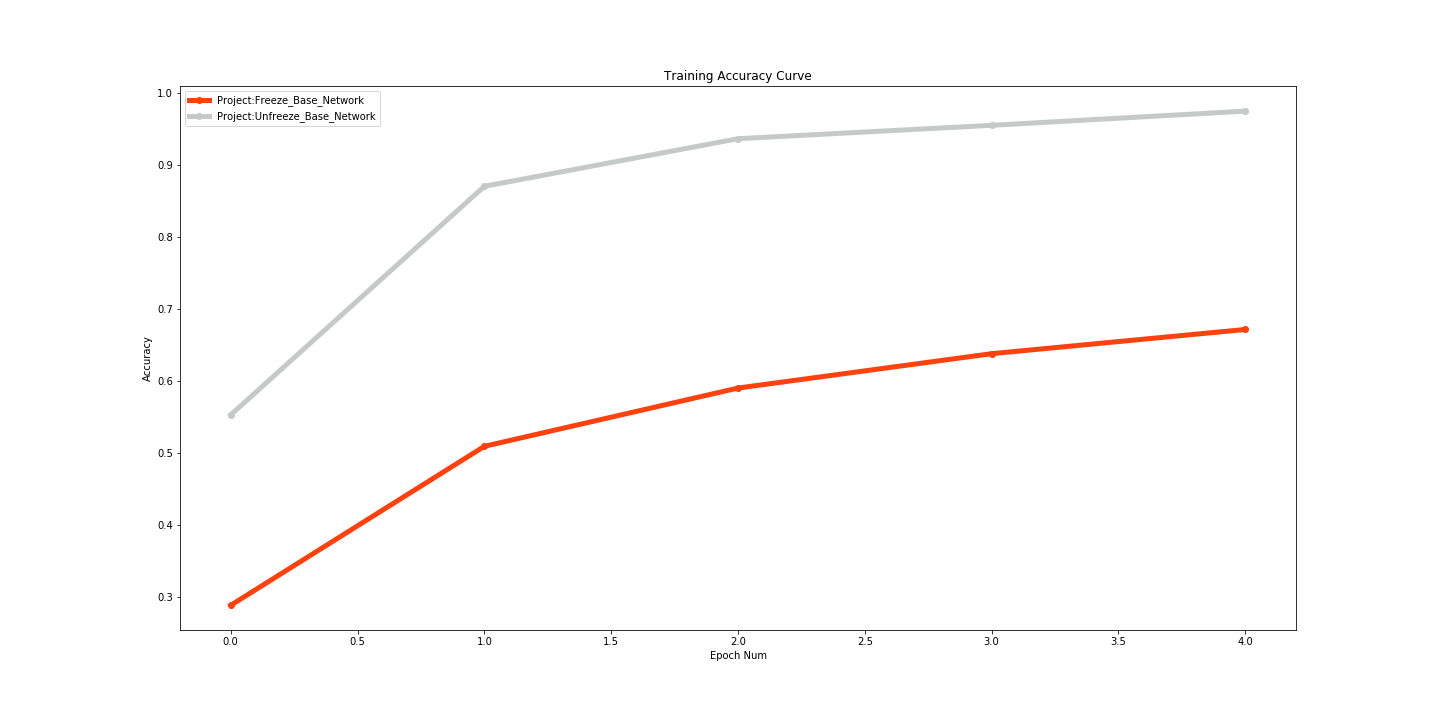

In [26]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/train_accuracy.png") 

### Training Loss Curves

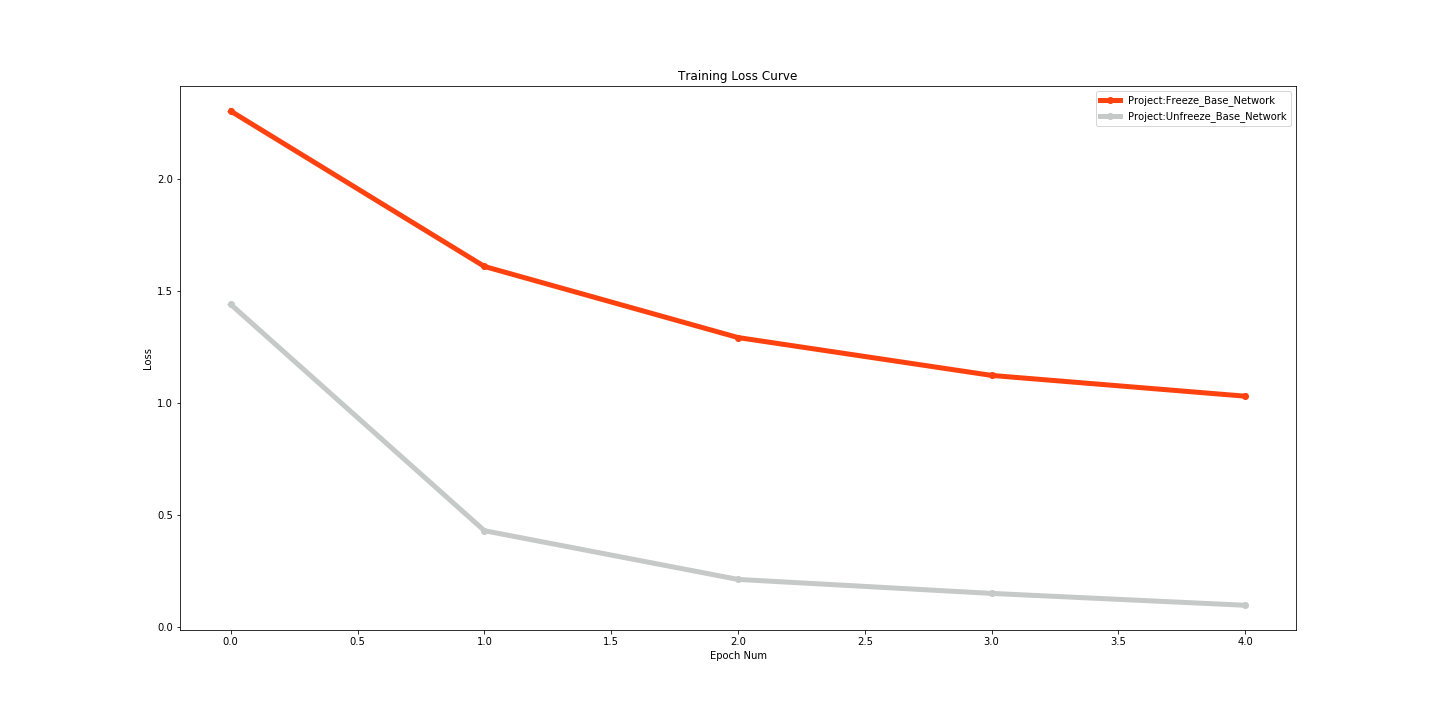

In [27]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/train_loss.png") 

### Validation Accuracy Curves

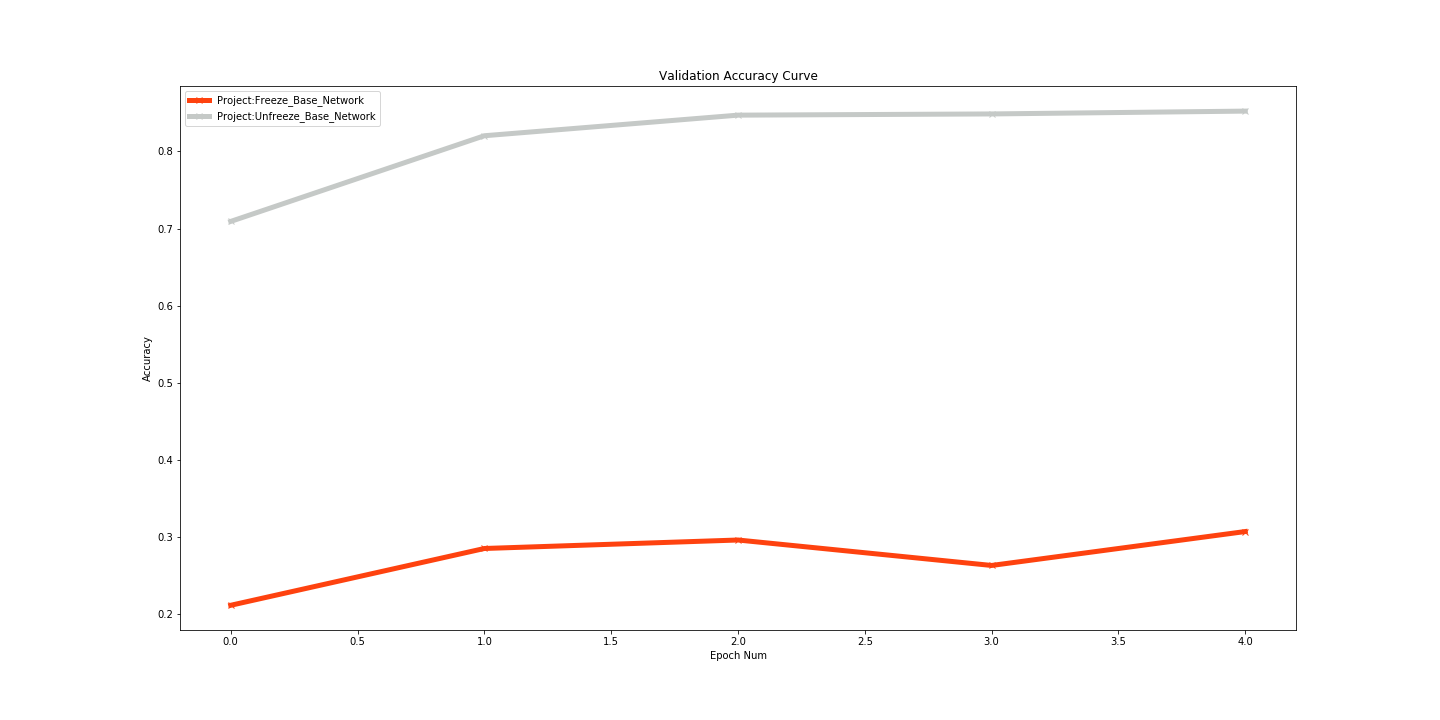

In [28]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/val_accuracy.png") 

### Validation loss curves

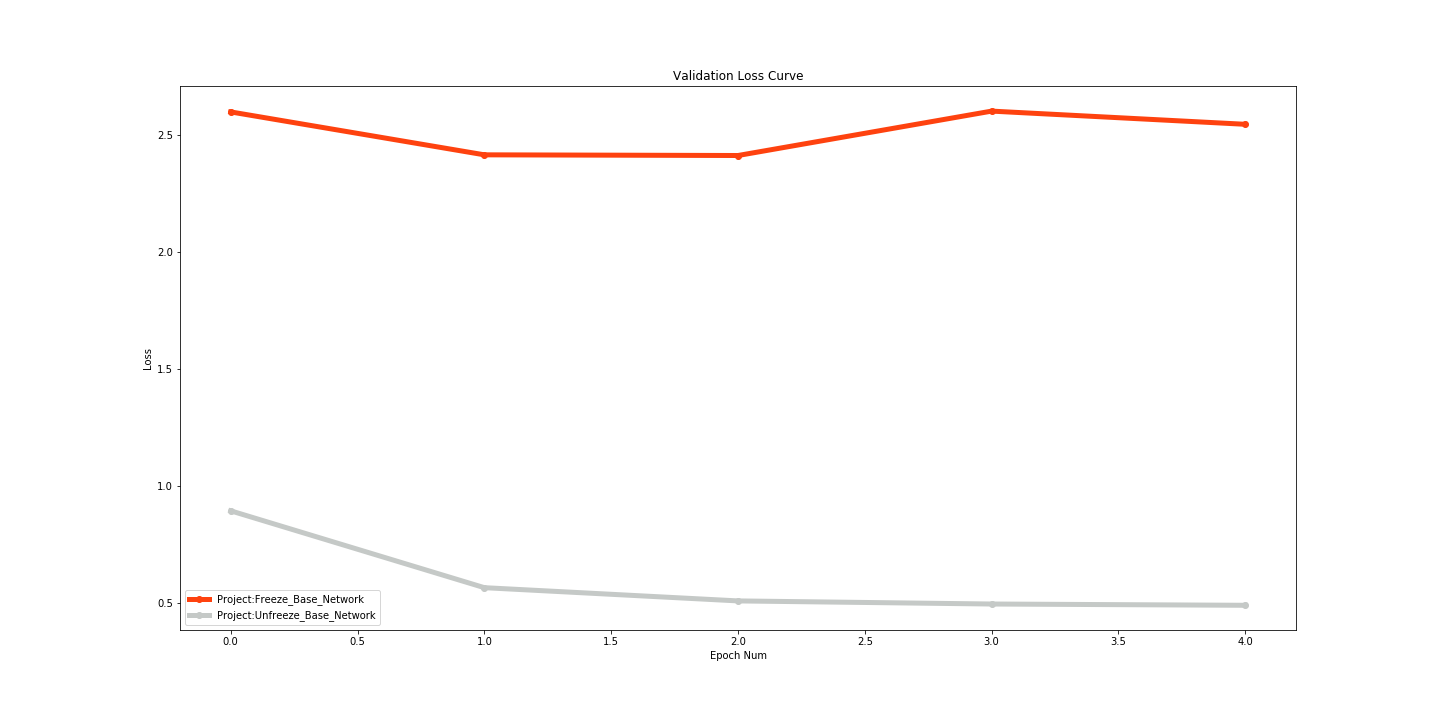

In [29]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/val_loss.png") 

## Accuracies achieved on validation dataset

### With freezing base network - 32.96
### Without freezing base network - 94.56

#### For this classifier, keeping the base network trainable seems to be a good option. Thus for other data it may result in overfitting the training data

(You may get a different result)